In [1]:
import numpy as np
import tcbench as tcb
from functions import (build_faiss_index, 
                       search_and_compare_labels, 
                       search_and_compare_labels_majority,
                       extract_results_majority,
                       plot_results_by_sample_size)

In [2]:
vectors_baseline = np.load('artifacts-mirage19/baseline_vectors.npy')
labels_baseline = np.load('artifacts-mirage19/baseline_labels.npy')
vectors_embeddings = np.load('artifacts-mirage19/embeddings_vectors.npy')
labels_embeddings = np.load('artifacts-mirage19/embeddings_labels.npy')

In [3]:
df_split = tcb.load_parquet(tcb.DATASETS.MIRAGE19, min_pkts=10, split=True)
train_val_indices = np.concatenate([df_split.iloc[0][0], df_split.iloc[0][1]])
test_indices = df_split.iloc[0][2]

In [4]:
index_baseline, selected_indices_baseline = build_faiss_index(vectors_baseline, labels_baseline, train_val_indices, 'euclidean', None)
coverage_percentage_baseline, match_percentage_baseline, _ = search_and_compare_labels(vectors_baseline, labels_baseline, test_indices, selected_indices_baseline, index_baseline, "distance", None)
print("Baseline - Coverage (%):", coverage_percentage_baseline)
print("Baseline - Match (%):", match_percentage_baseline)

coverage_percentage_baseline_majority, match_percentage_baseline_majority = search_and_compare_labels_majority(vectors_baseline, labels_baseline, test_indices, selected_indices_baseline, index_baseline, "distance", None)
print("Baseline Majority - Coverage (%):", coverage_percentage_baseline_majority)
print("Baseline Majority - Match (%):", match_percentage_baseline_majority)

Baseline - Coverage (%): 100.0
Baseline - Match (%): 64.08538485509504
Baseline Majority - Coverage (%): 100.0
Baseline Majority - Match (%): 60.54845746338423


In [5]:
index_embeddings, selected_indices_embeddings = build_faiss_index(vectors_embeddings, labels_embeddings, train_val_indices, 'euclidean', None)
coverage_percentage_embeddings, match_percentage_embeddings, _ = search_and_compare_labels(vectors_embeddings, labels_embeddings, test_indices, selected_indices_embeddings, index_embeddings, "distance", None)
print("Embeddings - Coverage (%):", coverage_percentage_embeddings)   
print("Embeddings - Match Percentage:", match_percentage_embeddings)

coverage_percentage_embeddings_majority, match_percentage_embeddings_majority = search_and_compare_labels_majority(vectors_embeddings, labels_embeddings, test_indices, selected_indices_embeddings, index_embeddings, "distance", None)
print("Embeddings Majority - Coverage (%):", coverage_percentage_embeddings_majority) 
print("Embeddings Majority - Match (%):", match_percentage_embeddings_majority)

Embeddings - Coverage (%): 100.0
Embeddings - Match Percentage: 79.38610158928014
Embeddings Majority - Coverage (%): 100.0
Embeddings Majority - Match (%): 81.20909940791525


In [6]:
index_embeddings_cosine, selected_indices_embeddings_cosine = build_faiss_index(vectors_embeddings, labels_embeddings, train_val_indices, 'cosine', None)
coverage_percentage_embeddings_cosine, match_percentage_embeddings_cosine, _ = search_and_compare_labels(vectors_embeddings, labels_embeddings, test_indices, selected_indices_embeddings_cosine, index_embeddings_cosine, "similarity", None)
print("Embeddings Cosine - Coverage (%):", coverage_percentage_embeddings_cosine)    
print("Embeddings Cosine - Match (%):", match_percentage_embeddings_cosine)

coverage_percentage_embeddings_cosine_majority, match_percentage_embeddings_cosine_majority = search_and_compare_labels_majority(vectors_embeddings, labels_embeddings, test_indices, selected_indices_embeddings_cosine, index_embeddings_cosine, "similarity", None)
print("Embeddings Cosine Majority - Coverage (%):", coverage_percentage_embeddings_cosine_majority)    
print("Embeddings Cosine Majority - Match (%):", match_percentage_embeddings_cosine_majority)

Embeddings Cosine - Coverage (%): 100.0
Embeddings Cosine - Match (%): 80.91305702711125
Embeddings Cosine Majority - Coverage (%): 100.0
Embeddings Cosine Majority - Match (%): 81.13119351822998


In [7]:
samples = [10, 100, 1000]

distances_baseline = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3]
distances_embeddings = [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]
similarities = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 
                0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999]

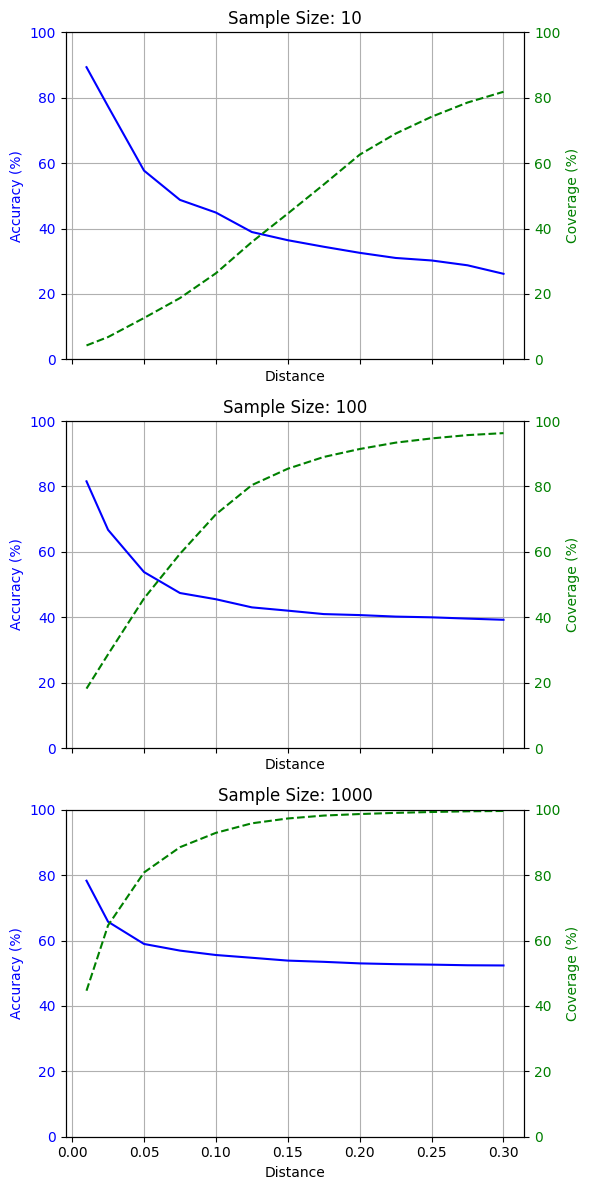

In [8]:
coverage_results_baseline_majority, accuracy_results_baseline_majority = extract_results_majority(vectors_baseline, labels_baseline, train_val_indices, test_indices, 'euclidean', 'distance', samples, distances_baseline)
plot_results_by_sample_size(coverage_results_baseline_majority, accuracy_results_baseline_majority, samples, distances_baseline)

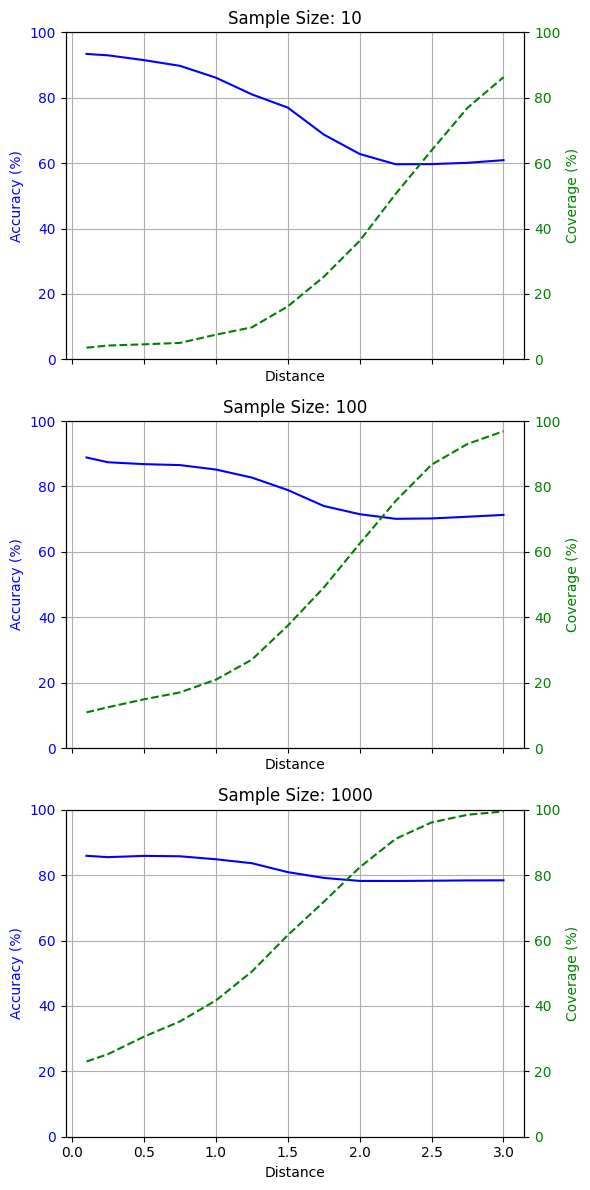

In [9]:
coverage_results_embeddings_majority, accuracy_results_embeddings_majority = extract_results_majority(vectors_embeddings, labels_embeddings, train_val_indices, test_indices, 'euclidean', 'distance', samples, distances_embeddings)
plot_results_by_sample_size(coverage_results_embeddings_majority, accuracy_results_embeddings_majority, samples, distances_embeddings)

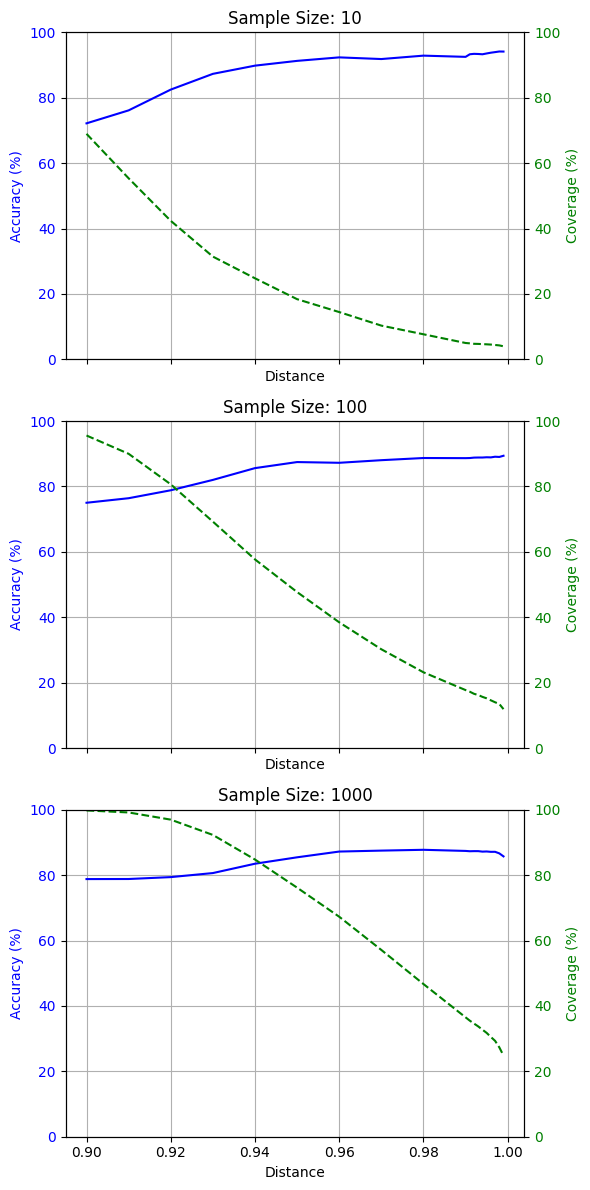

In [10]:
coverage_results_embeddings_cosine_majority, accuracy_results_embeddings_cosine_majority = extract_results_majority(vectors_embeddings, labels_embeddings, train_val_indices, test_indices, 'cosine', 'similarity', samples, similarities)
plot_results_by_sample_size(coverage_results_embeddings_cosine_majority, accuracy_results_embeddings_cosine_majority, samples, similarities)